<a href="https://colab.research.google.com/github/21IT34/My-Project/blob/main/Public_Health_Awareness_DataAnalysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount To Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load The DataSet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path="/content/drive/MyDrive/survey.csv"
id=pd.read_csv(path)
print(id)


                Timestamp  Age  Gender         Country state self_employed  \
0     2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1     2014-08-27 11:29:37   44       M   United States    IN           NaN   
2     2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3     2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4     2014-08-27 11:30:22   31    Male   United States    TX           NaN   
...                   ...  ...     ...             ...   ...           ...   
1254  2015-09-12 11:17:21   26    male  United Kingdom   NaN            No   
1255  2015-09-26 01:07:35   32    Male   United States    IL            No   
1256  2015-11-07 12:36:58   34    male   United States    CA            No   
1257  2015-11-30 21:25:06   46       f   United States    NC            No   
1258  2016-02-01 23:04:31   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  .

In [ ]:
#*****************************************************************************PROCESS THE DATASET************************************************************************************

#shape

id.shape



(1259, 27)

In [ ]:
#information

id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
#describe

id.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
#********************************************************************Cleansing the data******************************************************************************************

import pandas as pd
data = id.drop_duplicates()
data.to_csv("cleaned_dataset.csv", index=False)
print(data.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [ ]:
dt=id.head(30)


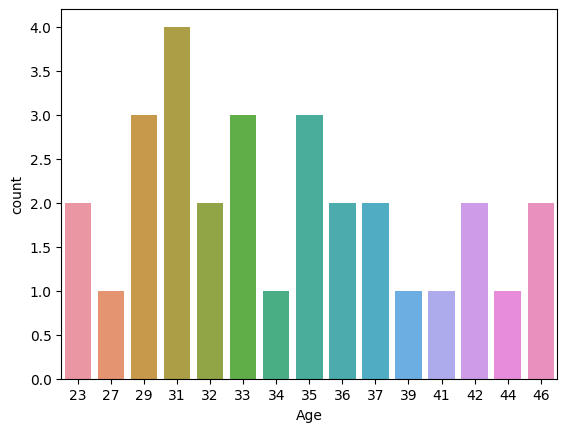

<Figure size 1000x600 with 0 Axes>

In [ ]:
#PLOTTING:

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Age",data=dt)

plt.figure(figsize=(10,6))
plt.show()

In [ ]:
#******************************************************************************ACCURACY*******************************************************************************************



#logistic regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)





#Accuracy of the data
print(accuracy_score(ytest, model.predict(xtest)))







0.96


In [ ]:
#******************************************************************************PHASE 4************************************************************************************************************


# Frequency of treatement :

response_counts = id['treatment'].value_counts()
print(response_counts)

Yes    637
No     622
Name: treatment, dtype: int64


In [ ]:
#Proposition :

response_proportions = id['treatment'].value_counts(normalize=True)
print(response_proportions)

Yes    0.505957
No     0.494043
Name: treatment, dtype: float64


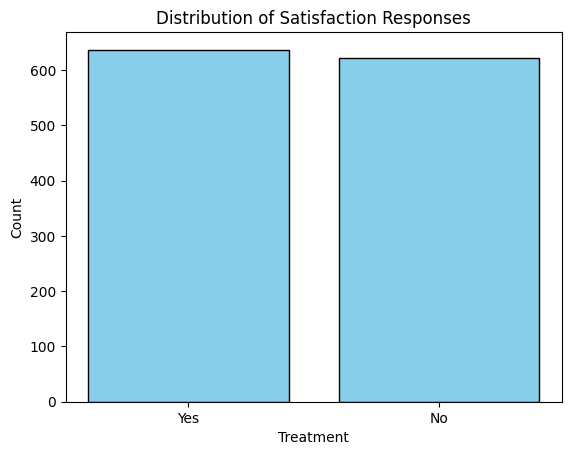

In [ ]:
#BAR GRAPH :

import matplotlib.pyplot as plt

plt.bar(response_counts.index,response_counts.values,color='skyblue',edgecolor='k')
plt.xlabel('Treatment')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Responses')
plt.show()

In [ ]:
#SUMMARY STATISTICS FOR TREATMENT :

# summary statistics for "Yes" responses

yes_stats = id[id['treatment'] == 'Yes'].describe()
print(yes_stats)

                Age
count  6.370000e+02
mean   1.569859e+08
std    3.962144e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.200000e+01
75%    3.700000e+01
max    1.000000e+11


In [ ]:
#summary statistics for "No" responses

no_stats = id[id['treatment'] == 'No'].describe()
print(no_stats)

              Age
count  622.000000
mean    31.361736
std      7.481982
min    -29.000000
25%     27.000000
50%     31.000000
75%     35.000000
max     65.000000


In [ ]:
#SUMMARY REPORTS FOR TREATMENT MADE :

# Calculate key statistics
total_responses = len(id)
yes_responses = (id['treatment'] == 'Yes').sum()
no_responses = total_responses - yes_responses
yes_percentage = (yes_responses / total_responses) * 100
no_percentage = 100 - yes_percentage



# Generate a summary report
summary_report = f"""
--------------------------
Summary Report
--------------------------

Total Responses: {total_responses}
Yes Responses: {yes_responses} ({yes_percentage:.2f}%)
No Responses: {no_responses} ({no_percentage:.2f}%)

Distribution of Satisfaction Responses:
See the bar chart below.

--------------------------

"""

print(summary_report)


--------------------------
Summary Report
--------------------------

Total Responses: 1259
Yes Responses: 637 (50.60%)
No Responses: 622 (49.40%) 

Distribution of Satisfaction Responses:
See the bar chart below.

--------------------------




<ipython-input-26-2f0763557ae2>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = id .corr()


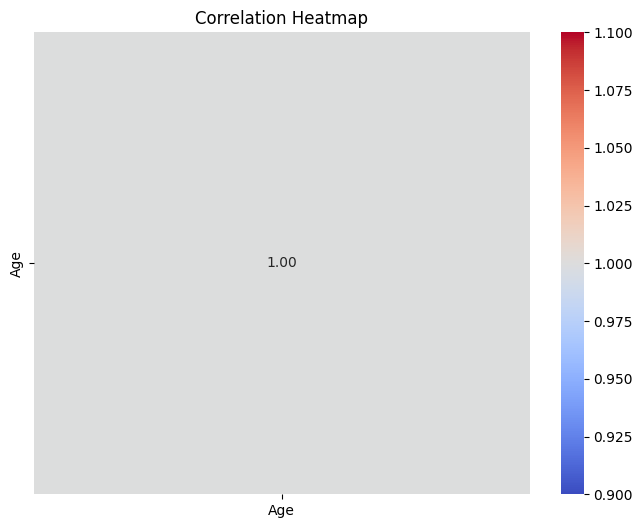

In [ ]:
#CORELATION :

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation heatmap
correlation_matrix = id .corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


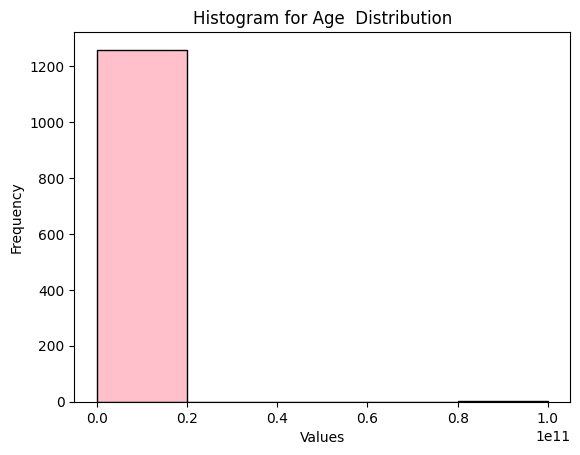

In [ ]:
#HISTOGRAM FOR AGE DISTRIBUTION :

data=id.Age

plt.hist(data, bins=5, edgecolor='k',color='pink')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram for Age  Distribution')
plt.show()